# Data Preprocessing

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Data**

In [ ]:
df = pd.read_csv('/content/zomato.csv', error_bad_lines=False, warn_bad_lines=False, engine="python")

<ipython-input-90-c7ebec690525>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/zomato.csv', error_bad_lines=False, warn_bad_lines=False, engine="python")
<ipython-input-90-c7ebec690525>:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/zomato.csv', error_bad_lines=False, warn_bad_lines=False, engine="python")


In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
##Shape
print("Number of Columns: ", df.shape[1])
print("Number of Rows: ", df.shape[0])
print("Columns: ")
df.columns

Number of Columns:  17
Number of Rows:  3443
Columns: 


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
## Understanding the distribution of data
print("Describing numerical columns")
print(df.describe())

Describing numerical columns
             votes
count  3443.000000
mean    177.531513
std     447.729429
min       0.000000
25%       7.000000
50%      37.000000
75%     150.000000
max    4884.000000


In [ ]:
## Exploring Columns
print("Finding out null values and data type of each column.")
df.info()

Finding out null values and data type of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3443 entries, 0 to 3442
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          3443 non-null   object
 1   address                      3443 non-null   object
 2   name                         3443 non-null   object
 3   online_order                 3443 non-null   object
 4   book_table                   3443 non-null   object
 5   rate                         2977 non-null   object
 6   votes                        3443 non-null   int64 
 7   phone                        3395 non-null   object
 8   location                     3442 non-null   object
 9   rest_type                    3429 non-null   object
 10  dish_liked                   1390 non-null   object
 11  cuisines                     3439 non-null   object
 12  approx_cost(for two people)  3439 n

 **Data Cleaning**

In [ ]:
#Dropping Unwanted Variables
df = df.drop(columns=['url', 'address', 'phone','reviews_list','menu_item', 'dish_liked', "listed_in(type)",	"listed_in(city)"], axis=1)

In [ ]:
#Dropping Duplicate Values
df = df.drop_duplicates()

In [ ]:
##Renaming Columns
df = df.rename({"approx_cost(for two people)":"cost_for_two"}, axis=1)

**Date Exploration**

**Rate**

In [ ]:
#The Rate Column has object Dtype, so we use a Helper Function to convert it to Float
def cleanRate(data):
  try:
    data = float(data.split('/')[0])
  except (TypeError, ValueError, AttributeError) as e:
    data = np.nan
  return data

#Calling the Helper Function
df['rate'] = df['rate'].apply(cleanRate)

Restaurant Type

In [ ]:
df['rest_type'].value_counts()

Quick Bites                   19101
Casual Dining                 10209
Cafe                           3671
Delivery                       2593
Dessert Parlor                 2253
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

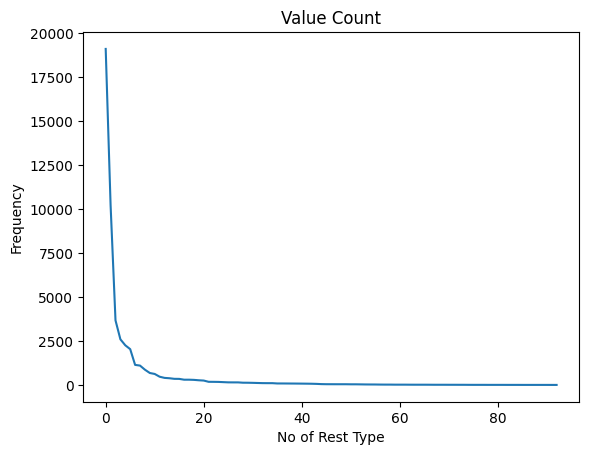

In [ ]:
#Plotting The Value Count of Rest Type
n = len(df['rest_type'].value_counts())
plt.plot(range(n), df['rest_type'].value_counts())
plt.xlabel('No of Rest Type')
plt.ylabel('Frequency')
plt.title('Value Count')
plt.show()

In [ ]:
#From the above plot we can conclude that, there are only 10 rest_type frequently used
#After 10 Frequency decreases significantly
#Store all the Low Frequency Values in a variable
rest_type = df["rest_type"].value_counts(ascending = False)
rest_lowFreq = rest_type[rest_type<700]

In [ ]:
#Helper Function to convert Low Frequency values into one label 'Other'
def rest_type(data):
    if data in rest_lowFreq or data==np.nan:
        return "Other"
    else:
        return data
#Calling Helper Function
df["rest_type"] = df["rest_type"].apply(rest_type)

Approx Cost (for two people)

In [ ]:
#approx_cost(for two people) has object Dtype, we need to convert to float
df['approx_cost(for two people)'].dropna(inplace=True)
df['approx_cost'] = df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',', ''))
df['approx_cost'] = df['approx_cost'].astype(float)
df.drop(['approx_cost(for two people)'], axis=1, inplace=True)

**Handling Missing Values**

In [ ]:
df.isnull().sum()

name                   0
online_order           0
book_table             0
rate               10050
votes                  0
location              21
rest_type            224
cuisines              45
listed_in(type)        0
listed_in(city)        0
approx_cost          344
dtype: int64

In [ ]:
#Since the number of null values is less than 5% of the total data, we simply drop them
df.dropna(inplace=True)

# Univariate Analysis

Name

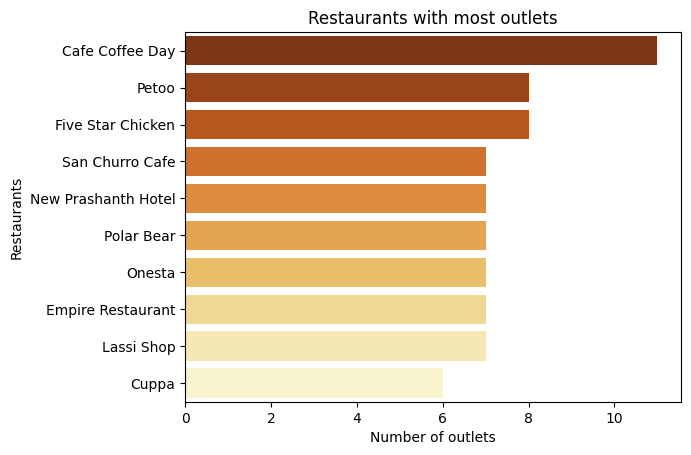

In [ ]:
names = df['name'].value_counts()[:10]
sns.barplot(x=names ,y=names.index, palette='YlOrBr_r')
plt.xlabel("Number of outlets")
plt.ylabel("Restaurants")
plt.title("Top 10 Restaurants with most outlets")
plt.show()

In [ ]:
#Above are the top 10 restaurants with most Outlets
#Onesta, Cafe coffee day, Empire Restaurant has the most number of outlets
#More outlets imply greater demand and greater numbers of customers.

Online Order

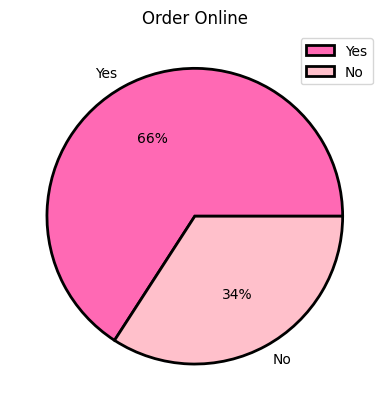

In [ ]:
mydata = df['online_order'].value_counts()
mylabel = df['online_order'].value_counts().index.to_list()
mycolors = [ "hotpink", "pink"]
plt.pie(mydata, labels = mylabel, colors = mycolors, autopct='%1.0f%%',
        wedgeprops = {"edgecolor" : "black", 'linewidth': 2, 'antialiased': True})
plt.title("Order Online")
plt.legend()
plt.show()

In [ ]:
#Nearly 40 percent of the restaurants do not accept online orders.
#This might be because of the fact that these restaurants cannot afford to pay commission to zomoto for giving them orders online.
#zomato may want to consider giving them some more benefits.

Book Table

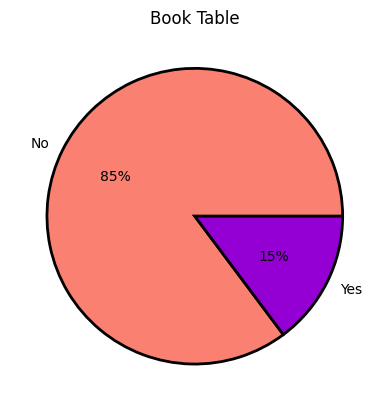

In [ ]:
mydata = df['book_table'].value_counts()
mylabel = df['book_table'].value_counts().index.to_list()
mycolors = ["salmon", "darkviolet"]
plt.pie(mydata, labels = mylabel, colors = mycolors, autopct='%1.0f%%',
        wedgeprops = {"edgecolor" : "black", 'linewidth': 2, 'antialiased': True})
plt.title("Book Table")
plt.show()

In [ ]:
#Most restaurants do not provide table booking facility.
#Which may cause inconvenience to the customers or force them to wait for their turn
#Therefore, zomato can market more as online food delivery app which is conveient and time saving

Rate

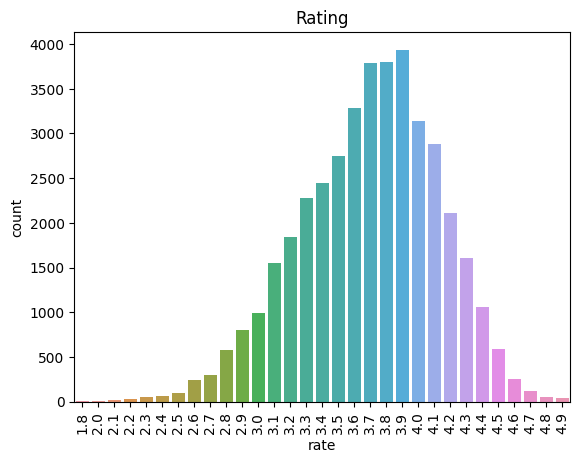

In [ ]:
ratings = df.sort_values(by=['rate'])
sns.countplot(x =ratings['rate'], label='Count')
plt.xticks(rotation=90)
plt.title("Rating")
plt.show()

In [ ]:
#Most restaurants are rated between 3.5 and 4
#Very few restaurants have rating above 4.5

In [ ]:
df['votes'].describe()

count    40708.000000
mean       324.129852
std        779.453891
min          0.000000
25%         21.000000
50%         71.000000
75%        262.000000
max      16832.000000
Name: votes, dtype: float64

Votes

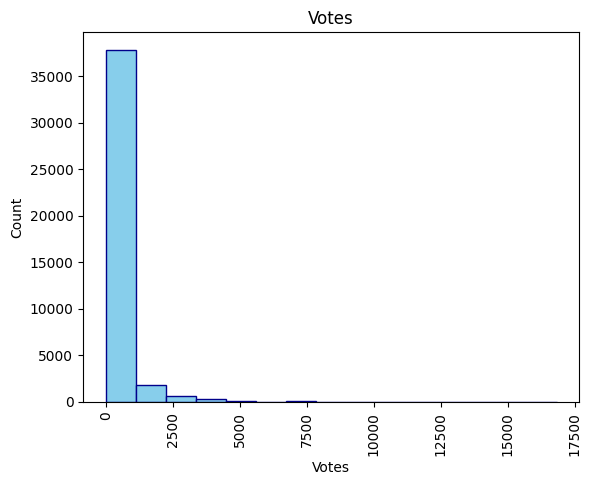

In [ ]:
votings = df.sort_values(by=['votes'])
plt.hist(votings['votes'], bins=15, color = "skyblue", ec='darkblue')
plt.xticks(rotation=90)
plt.xlabel("Votes")
plt.ylabel("Count")
plt.title("Votes")
plt.show()

In [ ]:
#Votes implies Popularity
#The data is heavily skewed to the right, close to zero, which is not good

Location

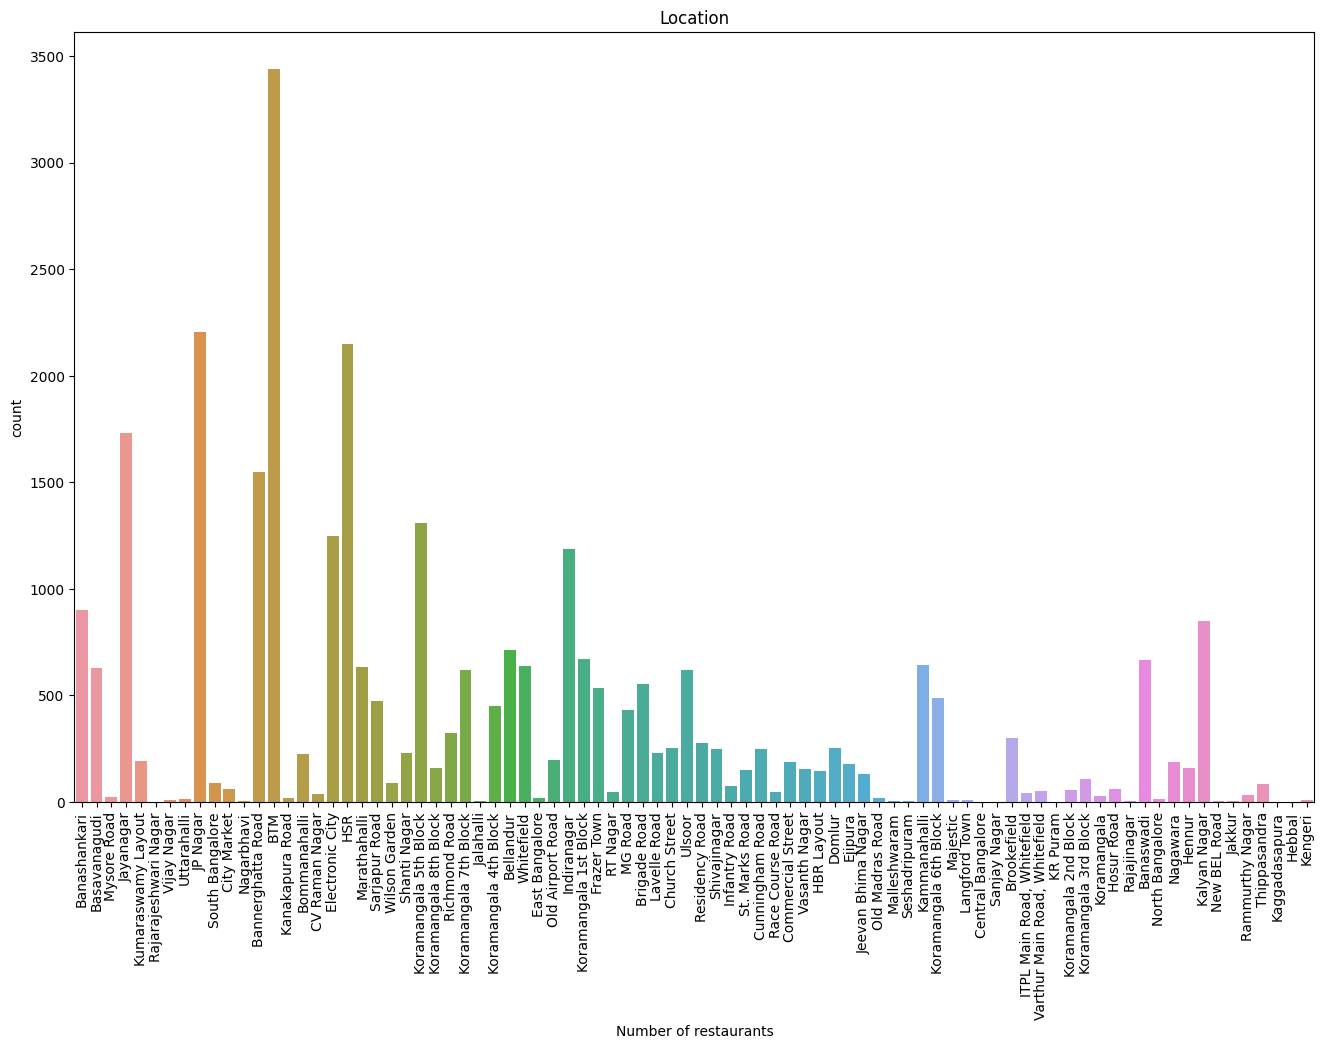

In [ ]:
plt.figure(figsize = (16, 10))
ax = sns.countplot(df, x = 'location')
plt.xticks(rotation=90)
plt.xlabel("Number of restaurants")
plt.title("Location")
plt.show()

In [ ]:
#We can see the few locations dominate the no. of restaurants significantly

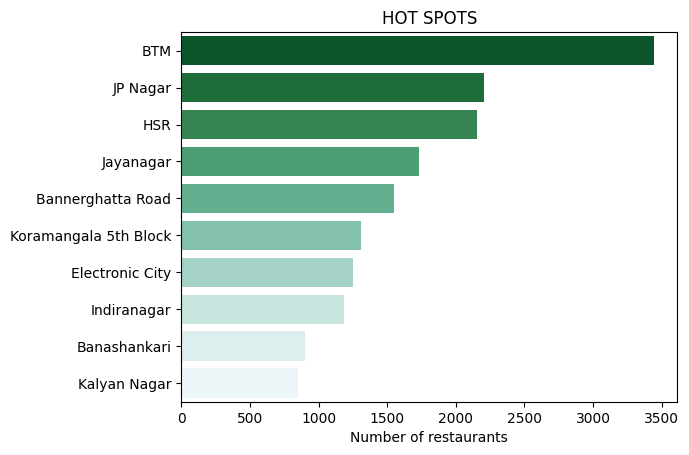

In [ ]:
location = df['location'].value_counts()[:10]
sns.barplot(x=location ,y=location.index, palette='BuGn_r')
plt.xlabel("Number of restaurants")
plt.title("HOT SPOTS")
plt.show()

In [ ]:
#We can see that BTM, Koranmangala 5th block and HSR has the most number of restaurants.
#BTM dominates the section by having more than 5000 restaurants.

Restaurant Types

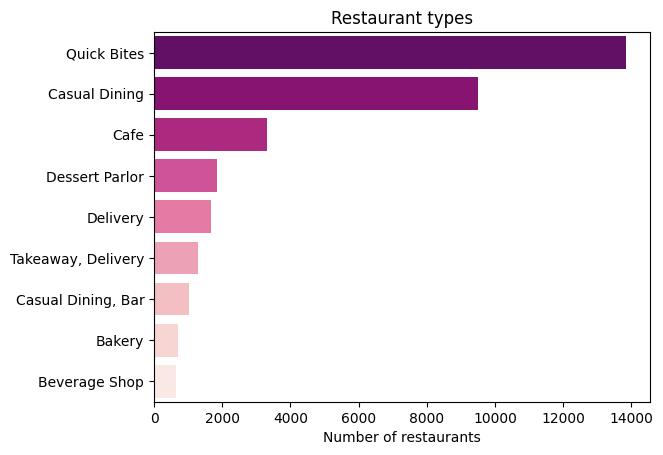

In [ ]:
daata = df[df['rest_type']!='Other'].copy()
rtype = daata['rest_type'].value_counts()[:10]
sns.barplot(x=rtype ,y=rtype.index, palette='RdPu_r')
plt.xlabel("Number of restaurants")
plt.title("Restaurant types")
plt.show()

Cuisines

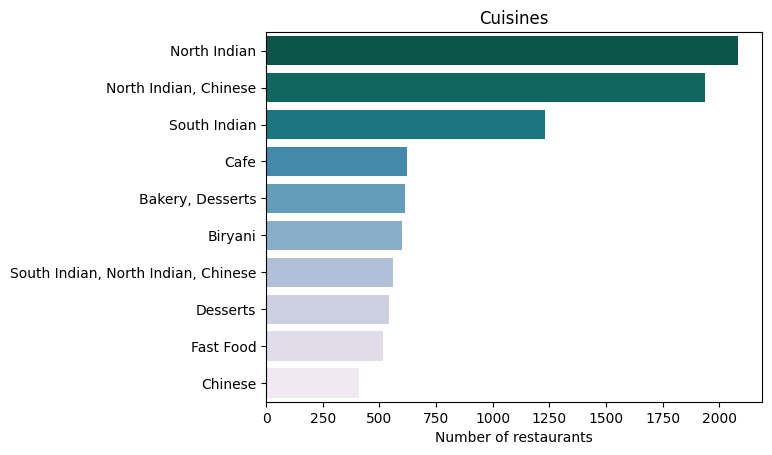

In [ ]:
rtype = df['cuisines'].value_counts()[:10]
sns.barplot(x=rtype ,y=rtype.index, palette='PuBuGn_r')
plt.xlabel("Number of restaurants")
plt.title("Cuisines")
plt.show()

In [ ]:
#We can observe that North Indian, chinese, South Indian and Biriyani are most common.
#From there if we were to plot all the cuisines we could see a steep decrease in number of restaurants

Approx Cost

Text(0.5, 1.0, 'Cost Distrubution for all restaurants')

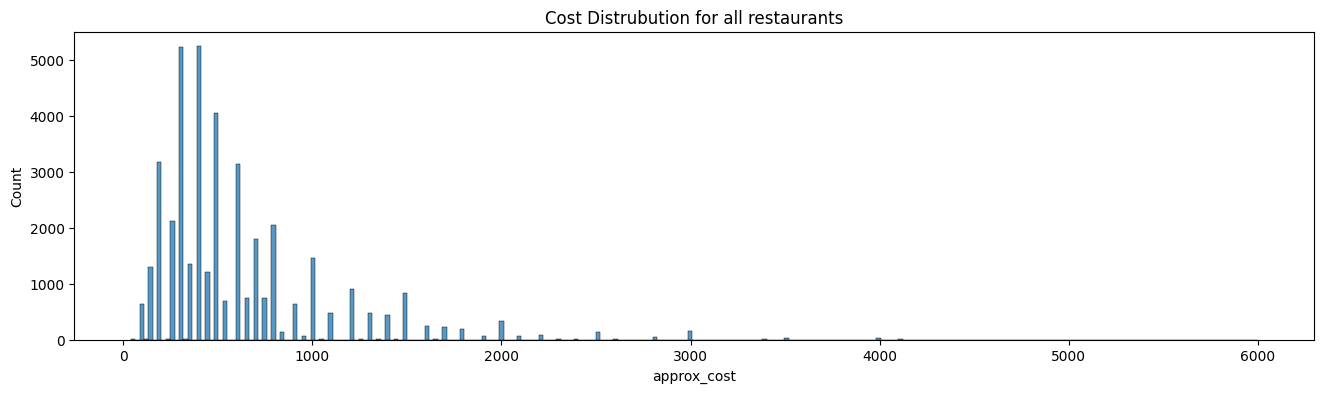

In [ ]:
fig, ax = plt.subplots(figsize=[16,4])
sns.histplot(df['approx_cost'],ax=ax)
ax.set_title('Cost Distrubution for all restaurants')

In [ ]:
#Almost 90 percent of restaurants serve food for budget less than 1000 INR.

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'listed_in(type)', 'listed_in(city)',
       'approx_cost'],
      dtype='object')

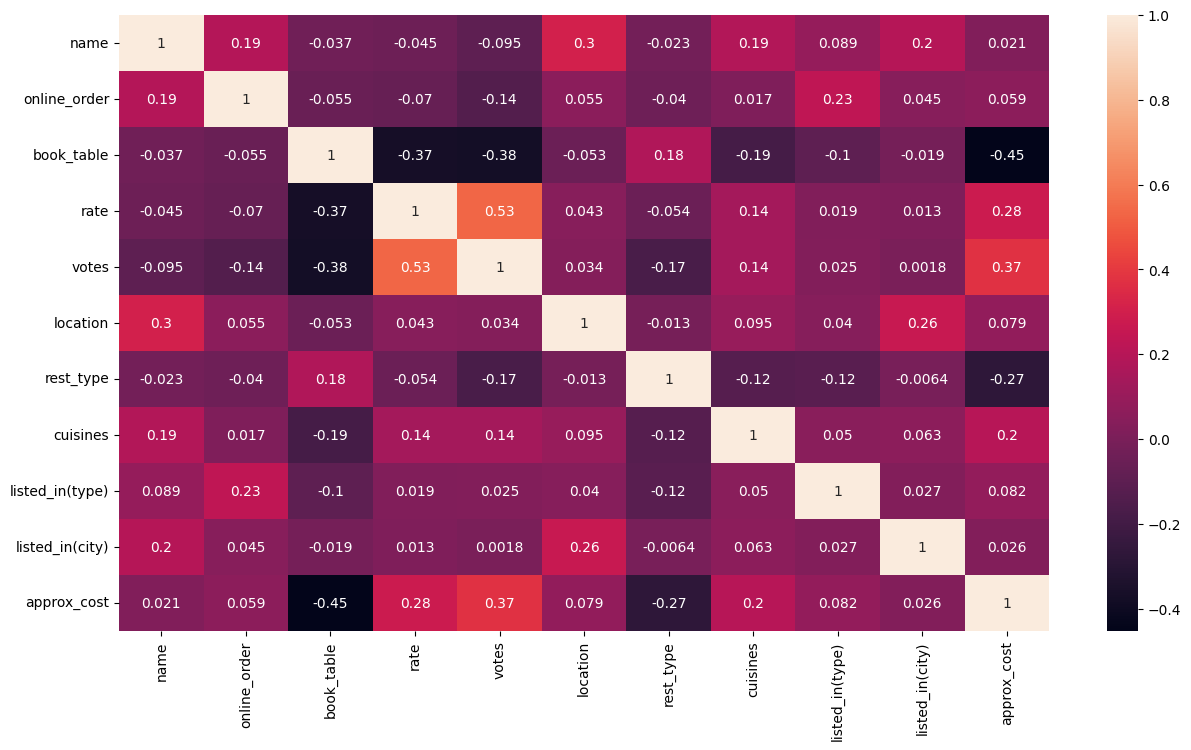

In [ ]:
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'approx_cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(df.copy())
#Get Correlation between different variables
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato_en.columns

# Multivariate Analysis

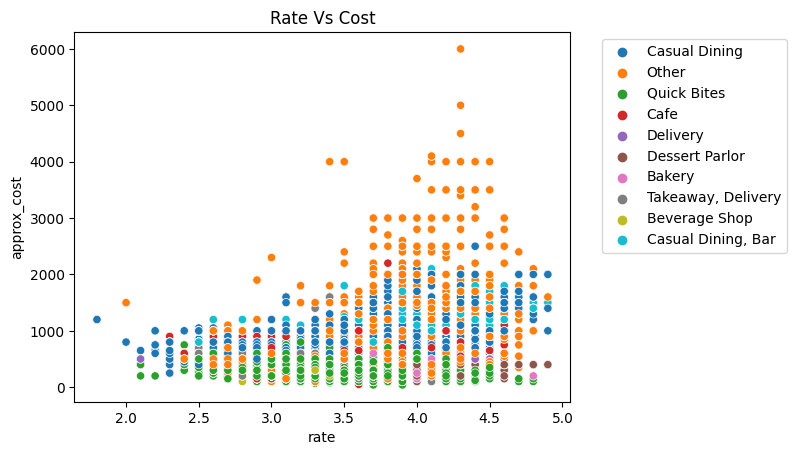

In [ ]:
sns.scatterplot(x="rate",y="approx_cost",hue="rest_type", data=df)
plt.title('Rate Vs Cost')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

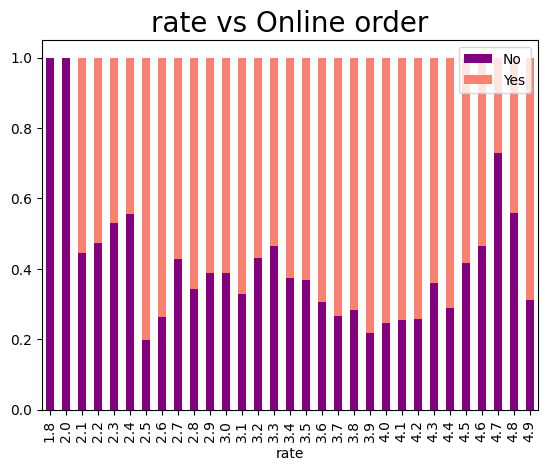

In [ ]:
x = pd.crosstab(df['rate'], df['online_order'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['purple','salmon'])
plt.title('Rate vs Online order', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

In [ ]:
x = pd.crosstab(df['rate'], df['online_order'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['purple','salmon'])
plt.title('rate vs Online order', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

<Axes: xlabel='online_order', ylabel='rate'>

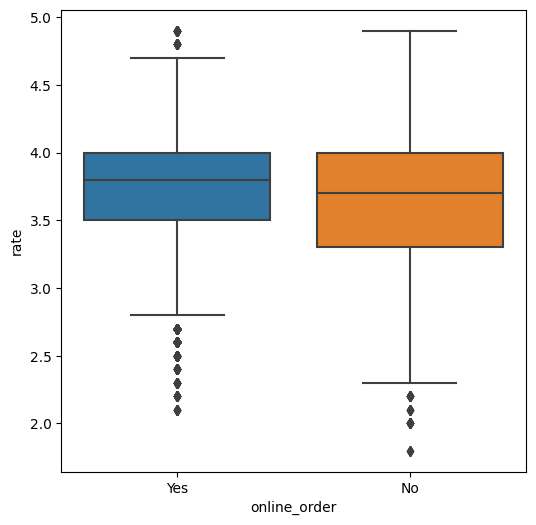

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x ='online_order', y ='rate', data = df)

<Axes: xlabel='book_table', ylabel='rate'>

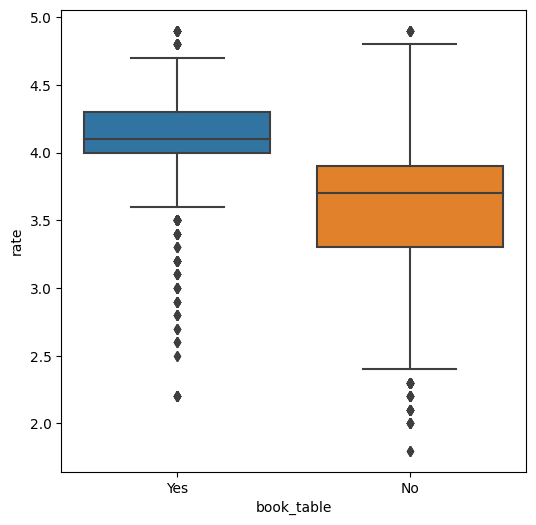

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

<Axes: xlabel='rest_type', ylabel='rate'>

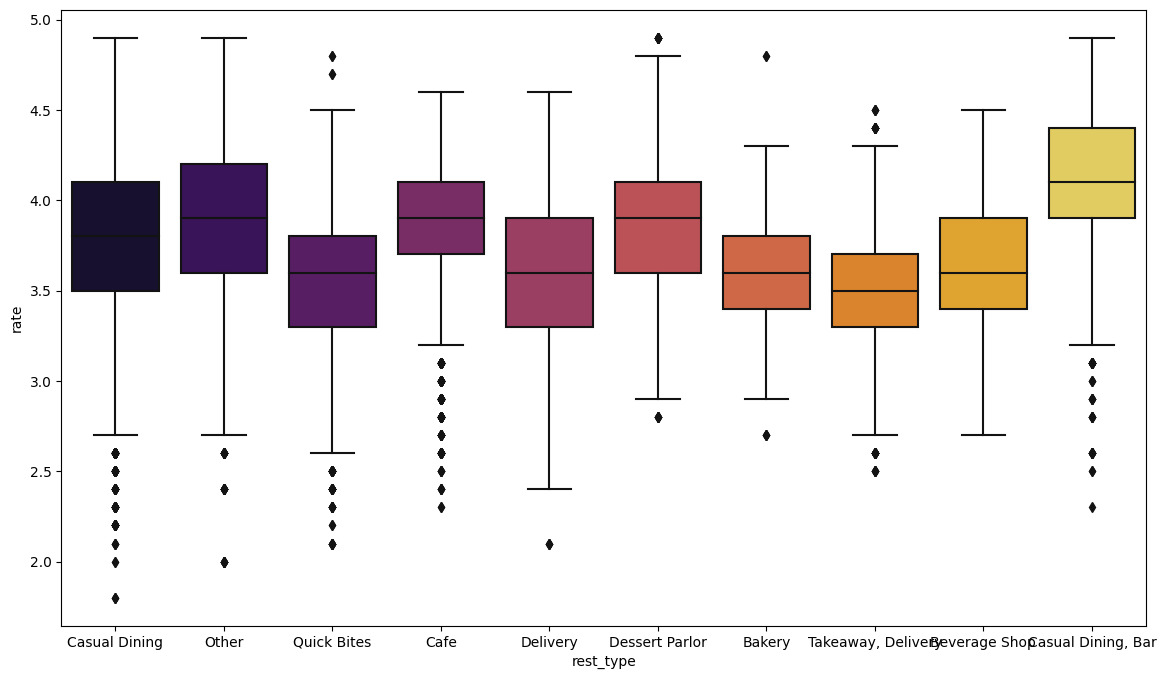

In [ ]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'rest_type', y = 'rate', data = df, palette = 'inferno')

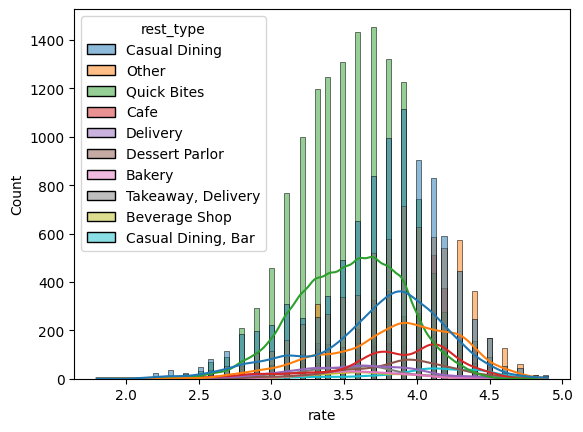

In [ ]:
sns.histplot(x='rate', data=df, kde=True, hue='rest_type')
plt.show()

In [ ]:
#Quick bites and Casual Dinning do well in the restaurant buisness
#Comparitively dessert rest_types like Cafe, Dessert Parlor and Bakery have very low ratings

# Model


In [ ]:
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'approx_cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato
data = Encode(df.copy())

In [ ]:
# data = pd.get_dummies(df, columns = ['name', 'cuisines', 'online_order', 'book_table', 'location', 'rest_type', 'listed_in(type)', 'listed_in(city)'])

In [ ]:
data.describe(include='all')

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,listed_in(type),listed_in(city),approx_cost
count,40708.000000,40708.000000,40708.000000,40708.000000,40708.000000,40708.000000,40708.000000,40708.000000,40708.000000,40708.000000,40708.000000
mean,2419.214037,0.341358,0.852191,3.695556,324.129852,29.306942,2.160902,497.753930,2.802029,14.426624,597.105139
std,1684.615874,0.474171,0.354915,0.434603,779.453891,20.352294,2.145413,574.158735,1.165453,7.991514,460.630803
min,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,1000.000000,0.000000,1.000000,3.400000,21.000000,13.000000,1.000000,50.000000,2.000000,7.000000,300.000000
50%,2144.000000,0.000000,1.000000,3.700000,71.000000,24.000000,2.000000,248.000000,2.000000,15.000000,500.000000
75%,3491.000000,1.000000,1.000000,4.000000,262.000000,39.000000,3.000000,841.000000,4.000000,20.000000,700.000000
max,6593.000000,1.000000,1.000000,4.900000,16832.000000,91.000000,9.000000,2358.000000,6.000000,29.000000,6000.000000


In [ ]:
# data.corr(method = 'pearson')

<Axes: >

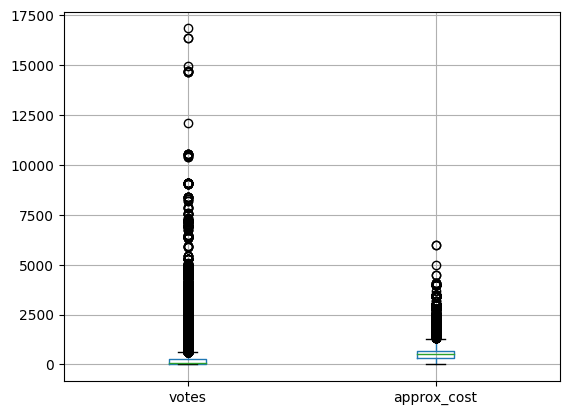

In [ ]:
df.boxplot(column = ['votes','approx_cost'])

The given data is noisy, one suitable machine learning model for data that is noisy is Random Forest.



In [ ]:
X = data.drop(['rate'], axis=1).values
y = data['rate'].values
score = []

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
score.append(r2_score(y_test, y_pred))

Support Vector Machine

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)
y_train_sc = sc_y.fit_transform(y_train.reshape(-1, 1))
y_test_sc = sc_y.transform(y_test.reshape(-1, 1))

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_sc, y_train_sc)
y_pred = svr.predict(X_test_sc)
score.append(r2_score(y_test_sc, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred= dt.predict(X_test)
score.append(r2_score(y_test, y_pred))

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
score.append(r2_score(y_test, y_pred))

XG Boost

In [ ]:
import xgboost as xgb
xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)
y_pred= xg.predict(X_test)
score.append(r2_score(y_test, y_pred))

Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred= gbr.predict(X_test)
score.append(r2_score(y_test, y_pred))

Model Selection

In [ ]:
models = pd.DataFrame({

    'Model' : ['Linear Regression', 'Support Vector Regression', 'Decision Tree', 'Random Forest',
               'XgBoost', 'Gradient Boost'],
    'Score' : score
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,0.918123
2,Decision Tree,0.872820
4,XgBoost,0.758881
5,Gradient Boost,0.518829
1,Support Vector Regression,0.442762
0,Linear Regression,0.289959


Important Features

In [ ]:
impFeature = pd.Series(rf.feature_importances_, data.drop(['rate'], axis=1).columns).sort_values(ascending=False)
impFeature

votes              0.501343
name               0.130758
cuisines           0.104971
approx_cost        0.080842
location           0.078005
rest_type          0.051448
listed_in(city)    0.018926
book_table         0.016735
online_order       0.012628
listed_in(type)    0.004344
dtype: float64

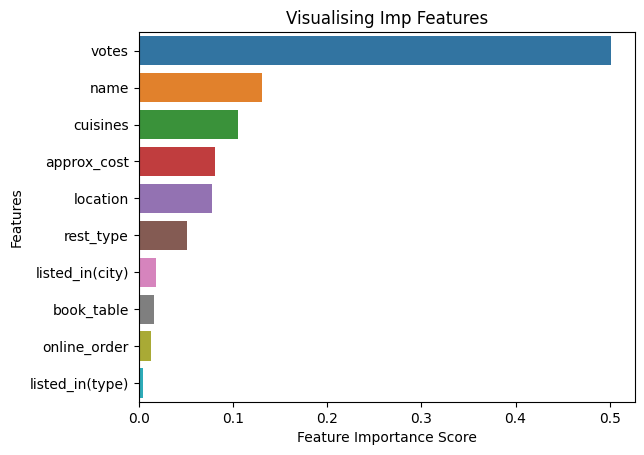

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=impFeature, y=impFeature.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualising Imp Features')
plt.show()

In [ ]:
features = []
scoress = []
for i in impFeature.index:
  features.append(i)
  X_train, X_test, y_train, y_test = train_test_split(data[features], y, test_size=0.25, random_state=0)
  rf.fit(X_train, y_train)
  scoress.append(r2_score(y_test,rf.predict(X_test)))

In [ ]:
newfeatures = pd.DataFrame({ "Feature No." : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'Score' : scoress })
newfeatures.sort_values(by = 'Score', ascending = False)

,Feature No.,Score
5,6,0.932681
4,5,0.929459
3,4,0.923326
6,7,0.922801
7,8,0.921105
8,9,0.920719
9,10,0.917581
2,3,0.911519
1,2,0.893866
0,1,0.419504


Hyper Parameter Tunning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['votes', 'name', 'cuisines', 'approx_cost', 'location', 'rest_type']], y, test_size=0.25, random_state=0)
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20, 25],
}
grid_search = GridSearchCV(rf, params,cv=5)
grid_search.fit(X_train, y_train)

grid = pd.DataFrame(grid_search.cv_results_)
print(grid[['param_max_depth','mean_test_score']])

print('Best parameters:', grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print('Accuracy:', r2_score(y_test, y_pred))

   param_max_depth  mean_test_score
0               10         0.654763
1               10         0.654663
2               10         0.655789
3               15         0.843720
4               15         0.845884
5               15         0.846448
6               20         0.900326
7               20         0.901797
8               20         0.902865
9               25         0.906468
10              25         0.908976
11              25         0.909280
Best parameters: {'max_depth': 25, 'n_estimators': 150}
Accuracy: 0.9316095191140005


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9316095191140005

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.01274586626229477